In [1]:
import xnemogcm
import xgcm
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import gsw
import cmocean.cm as cmo
import xarray as xr

import cmasher as cmr
import matplotlib.colors as mcolors
xr.set_options(keep_attrs=True)
plt.rcParams['font.size']=16

In [3]:
rho=1026
cp=4000
rd=60
dt=86400


In [6]:
ds2=xr.open_mfdataset('../../MAUD_RISE_config/maud_v4/m36_ke2/mld*_m36.nc',chunks={'t':60})
bat=xr.open_dataset('../../MAUD_RISE_config/maud_v4/m36_mask/1_domain_cfg_50levels_new.nc')
bat.coords['nav_lon']=bat.nav_lon.mean(dim='y')
bat.coords['nav_lat']=bat.nav_lat.mean(dim='x')
bat=bat.swap_dims({'x':'x_c','y':'y_c','z':'z_c'})

# combine the datasets
ds=xr.merge((ds2,bat.bathy_meter))
ds.coords['month']=ds.t.dt.month
ds.coords['year']=ds.t.dt.year
ds.coords['day']=ds.t.dt.day

del ds['nav_lon']
del ds['nav_lat']

ds36=ds

grid36 = xgcm.Grid(ds, coords={"X": {"center": "x_c", "right": "x_f"},"Y": {"center": "y_c", "right": "y_f"},"T":{"center":"t"},"Z":{"center":"z_c", "left":"z_f"}})
mean_bathy36 = ds.bathy_meter.rolling(x_c=39,center=True).mean().rolling(y_c=39,center=True).mean()
time_array36=np.array(ds.t,dtype=np.datetime64)

ds36.coords['year']=ds36.t.dt.year
ds36

<xarray.Dataset>
Dimensions:      (t: 4178, x_c: 879, y_c: 804)
Coordinates:
  * x_c          (x_c) int64 0 1 2 3 4 5 6 7 ... 871 872 873 874 875 876 877 878
  * y_c          (y_c) int64 0 1 2 3 4 5 6 7 ... 796 797 798 799 800 801 802 803
  * t            (t) datetime64[ns] 2007-01-01T12:00:00 ... 2018-06-11T12:00:00
    glamt        (y_c, x_c) float64 dask.array<chunksize=(804, 879), meta=np.ndarray>
    gphit        (y_c, x_c) float64 dask.array<chunksize=(804, 879), meta=np.ndarray>
    month        (t) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 5 6 6 6 6 6 6 6 6 6 6 6
    year         (t) int64 2007 2007 2007 2007 2007 ... 2018 2018 2018 2018 2018
    day          (t) int64 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    mldr10_1     (t, y_c, x_c) float32 dask.array<chunksize=(31, 804, 879), meta=np.ndarray>
    bathy_meter  (y_c, x_c) float32 7.168 7.168 7.168 ... 5.03e+03 5.03e+03

/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/birte/anaconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))
/home/birte/anaconda3/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarn

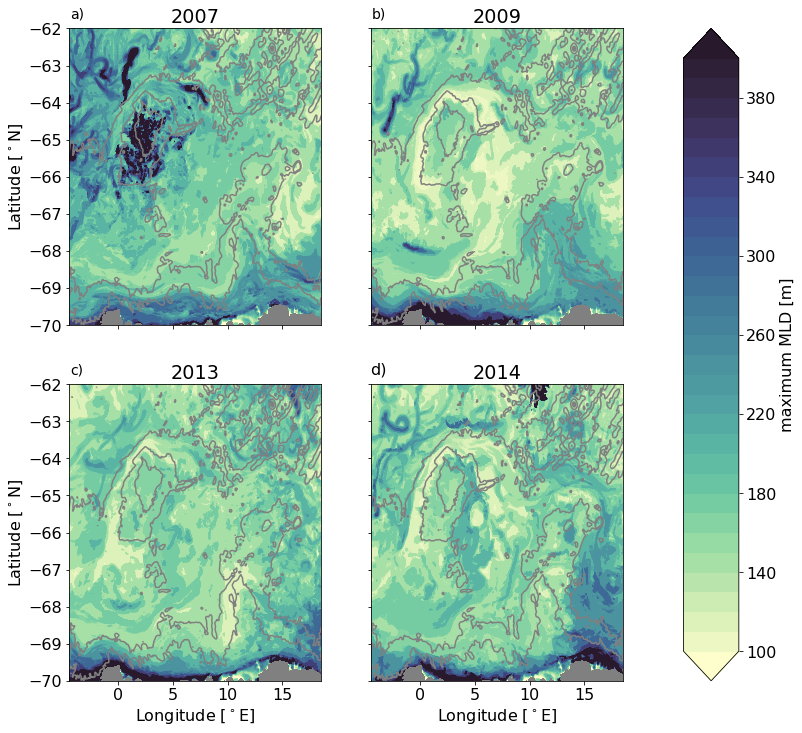

In [9]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,2, width_ratios=[1,.1],wspace=.2)#,wspace=0.3)
gs1 = GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[1], width_ratios=[1])
gs2 = GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0], width_ratios=[1,1])
col_ax = fig.add_subplot(gs1[0,0])
ax1 = fig.add_subplot(gs2[0,0])
ax2 = fig.add_subplot(gs2[0,1])
ax3 = fig.add_subplot(gs2[1,0])
ax4 = fig.add_subplot(gs2[1,1])

vamin = 100
vamax = 400
lev   = 31
ax=ax1
ds36.mldr10_1.where(ds36.year==2007).max(dim='t').plot.contourf(x="glamt",y="gphit",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
ds36.bathy_meter.plot.contour(x="glamt",y="gphit",ax=ax,levels=[2500,3500,5000],colors='grey')
ds36.bathy_meter.where(ds36.bathy_meter<1).plot.contourf(x="glamt",y="gphit",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('2007')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.set_ylabel('Latitude [$^\circ$N]')
ax.text(0.03, 1.05, 'a)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')
ax=ax2
ds36.mldr10_1.where(ds36.year==2009).max(dim='t').plot.contourf(x="glamt",y="gphit",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
ds36.bathy_meter.plot.contour(x="glamt",y="gphit",ax=ax,levels=[2500,3500,5000],colors='grey')
ds36.bathy_meter.where(ds36.bathy_meter<1).plot.contourf(x="glamt",y="gphit",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('2009')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.03, 1.05, 'b)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')
ax=ax3
ds36.mldr10_1.where(ds36.year==2013).max(dim='t').plot.contourf(x="glamt",y="gphit",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
ds36.bathy_meter.plot.contour(x="glamt",y="gphit",ax=ax,levels=[2500,3500,5000],colors='grey')
ds36.bathy_meter.where(ds36.bathy_meter<1).plot.contourf(x="glamt",y="gphit",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('2013')
ax.set_ylabel('Latitude [$^\circ$N]')
ax.set_xlabel('Longitude [$^\circ$E]')
ax.text(0.03, 1.05, 'c)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='14')
ax=ax4
cbm=ds36.mldr10_1.where(ds36.year==2014).max(dim='t').plot.contourf(x="glamt",y="gphit",ax=ax,vmin=vamin,vmax=vamax,levels=lev,cmap=cmo.deep,add_colorbar=False)
ds36.bathy_meter.plot.contour(x="glamt",y="gphit",ax=ax,levels=[2500,3500,5000],colors='grey')
ds36.bathy_meter.where(ds36.bathy_meter<1).plot.contourf(x="glamt",y="gphit",ax=ax,colors='gray',add_colorbar=False)
ax.set_xlim((-4.5,18.5))
ax.set_ylim(-70,-62)
ax.set_title('2014')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xlabel('Longitude [$^\circ$E]')
ax.text(0.03, 1.05, 'd)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize='16')

plt.colorbar(cbm,cax=col_ax,label='maximum MLD [m]')
#plt.savefig('./max_mld_m36.jpg',dpi=300)